# 빅데이터 분석 특강 (4주차) 3월 28일 

- toc:true
- branch: master
- badges: true
- comments: false
- author: 최서연
- categories: [Special Topics in Big Data Analysis, TensorFlow, TensorFlow NumPy]

### import 

In [218]:
import tensorflow as tf
import numpy as np 
import tensorflow.experimental.numpy as tnp 
import matplotlib.pyplot as plt

In [219]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [220]:
tnp.experimental_enable_numpy_behavior()

### 미분 

#### tf.GradientTape() 사용방법

`-` 예제9: 카페예제로 돌아오자. 

In [221]:
x = tnp.array([20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4])

In [222]:
tf.random.set_seed(43052)
epsilon=tf.random.normal([10])
y=10.2 + 2.2*x + epsilon

In [225]:
y

<tf.Tensor: shape=(10,), dtype=float64, numpy=
array([55.4183651 , 58.19427589, 61.23082496, 62.31255873, 63.1070028 ,
       63.69569103, 67.24704918, 71.43650092, 73.10130336, 77.84988286])>

loss 정의하고 싶다. 

In [226]:
beta0 = tf.Variable(9.0) 
beta1 = tf.Variable(2.0)  

---

차이

In [228]:
tf.Variable(3.0)

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>

In [229]:
tf.Variable([3.0])

<tf.Variable 'Variable:0' shape=(1,) dtype=float32, numpy=array([3.], dtype=float32)>

---

In [231]:
with tf.GradientTape(persistent=True) as tape: 
    loss = sum((y-beta0-beta1*x)**2)

In [232]:
tape.gradient(loss,beta0), tape.gradient(loss,beta1)

(<tf.Tensor: shape=(), dtype=float32, numpy=-126.78691>,
 <tf.Tensor: shape=(), dtype=float32, numpy=-3208.8396>)

`-` 예제10: 카페예제의 매트릭스 버전 

$\star$ 시험에 나와요 🍟

---

내 version...

```python
X=tf.transpose(tf.concat([[[1.0]*10],[x]],0))
```

---

교수님 version..

In [233]:
X = tnp.array([1]*10 +[20.1, 22.2, 22.7, 23.3, 24.4, 25.1, 26.2, 27.3, 28.4, 30.4]).reshape(2,10).T
X

<tf.Tensor: shape=(10, 2), dtype=float64, numpy=
array([[ 1. , 20.1],
       [ 1. , 22.2],
       [ 1. , 22.7],
       [ 1. , 23.3],
       [ 1. , 24.4],
       [ 1. , 25.1],
       [ 1. , 26.2],
       [ 1. , 27.3],
       [ 1. , 28.4],
       [ 1. , 30.4]])>

In [234]:
beta = tnp.array([9.0,2.0]).reshape(2,1)
beta

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[9.],
       [2.]])>

---

같은 방법

```python
beta = tnp.array([9.0],[2.0])
beta_true = tnp.array([10.0],[2.2])
```

---

In [237]:
X@beta

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[49.2],
       [53.4],
       [54.4],
       [55.6],
       [57.8],
       [59.2],
       [61.4],
       [63.6],
       [65.8],
       [69.8]])>

In [238]:
beta_true= tnp.array([10.2,2.2]).reshape(2,1)
y= X@beta_true+epsilon.reshape(10,1) 
y

<tf.Tensor: shape=(10, 1), dtype=float64, numpy=
array([[55.4183651 ],
       [58.19427589],
       [61.23082496],
       [62.31255873],
       [63.1070028 ],
       [63.69569103],
       [67.24704918],
       [71.43650092],
       [73.10130336],
       [77.84988286]])>

---

epsilon 정의 안 하고 하는 법
```python
y = X@beta_true + tf.random.randn(10).reshape(10,1)
```

---

In [239]:
with tf.GradientTape(persistent=True) as tape: 
    tape.watch(beta)
    yhat= X@beta
    loss= (y-yhat).T @(y-yhat) 

`-` 텐서플로우가 계산한 미분값

In [240]:
tape.gradient(loss,beta)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -126.78690968],
       [-3208.83947922]])>

`-` 이론적인 값을 확인

$loss = -2\bf{X}^\top \bf{y} + 2\bf{X}^\top \bf{XB}$

In [241]:
-2*X.T @ y + 2*X.T@X@beta 

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -126.78690968],
       [-3208.83947922]])>

`-` 예제11: 위의 예제에서 이론적인 $\boldsymbol{\beta}$의 최적값을 찾아보고 (즉 $\boldsymbol{\hat\beta}$을 찾고) 그 지점에서 loss의 미분값(=접선의 기울기)를 구하라. 결과가 $\bf{0}$인지 확인하라. (단 ${\bf 0}$은 길이가 2이고 각 원소가 0인 벡터)

$\star$ 시험에 나와요 🍟

이변량..loss를 미분해서 도함수를 구하고 베타를 대입..

$\beta$의 최적값은 $(X'X)^{-1}X'y$이다. 

$\hat{\bf{B}} = (\bf{X}^\top \bf{X})^{-1}\bf{X}^\top \bf{y}$

In [242]:
beta_optimal = tf.linalg.inv(X.T @ X) @ X.T  @y  # 이보다 loss를 작게 만드는 beta는 없다.

In [243]:
with tf.GradientTape(persistent=True) as tape: 
    tape.watch(beta_optimal)
    yhat= X@beta_optimal
    loss= (y-yhat).T @(y-yhat) 

In [244]:
tape.gradient(loss,beta_optimal)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[-6.67910172e-12],
       [-1.67774636e-10]])>

> Note: true값보다 optimal값이 더 최적...더 낫다고 할 수 있다!

`-` beta_true에서 기울기를 계산해보자

In [245]:
with tf.GradientTape(persistent=True) as tape: 
    tape.watch(beta_true)
    yhat= X@beta_true
    loss= (y-yhat).T @(y-yhat) 

In [246]:
tape.gradient(loss,beta_true)

<tf.Tensor: shape=(2, 1), dtype=float64, numpy=
array([[ -2.74690968],
       [-71.45947922]])>

`-` 샘플사이즈가 커진다면 `tape.gradient(loss,beta_true)` 값과 `tape.gradient(loss,beta_optimal)` 값이 비슷해진다.

`-` $\therefore$ 샘플사이즈가 커진다면 `beta_true` $\approx$ `beta_optimal` 과 같은 말

`-` *y를 최소화하는 x를 구해라 $\approx$ loss를 최소화하는  beta를 구해라*

## 경사하강법 

### 최적화문제 

`-` $loss=(\frac{1}{2}\beta-1)^2$를 최소하는 $\beta$를 컴퓨터를 활용하여 구하는 문제를 생각해보자.
- 답은 $\beta = 2$ 임을 알고 있다.

- beta를 수없이 만들어내서 계산을 해보자

### 방법1: grid search

#### 알고리즘 

(1) beta = [-10.00,-9.99,...,10.00] 와 같은 리스트를 만든다.

(2) (1)의 리스트의 각 원소에 해당하는 loss(=$(\frac{1}{2}\beta - 1)^2$)를 구한다.

(3) (2)에서 구한 loss를 제일 작게 만드는 beta를 찾는다.

#### 구현코드 

In [247]:
beta = np.linspace(-10,10,100) 
loss = (beta/2 -1)**2 

In [248]:
#collapse_output
loss

array([3.60000000e+01, 3.47980818e+01, 3.36165697e+01, 3.24554637e+01,
       3.13147638e+01, 3.01944700e+01, 2.90945822e+01, 2.80151005e+01,
       2.69560249e+01, 2.59173554e+01, 2.48990919e+01, 2.39012346e+01,
       2.29237833e+01, 2.19667381e+01, 2.10300990e+01, 2.01138659e+01,
       1.92180390e+01, 1.83426181e+01, 1.74876033e+01, 1.66529946e+01,
       1.58387920e+01, 1.50449954e+01, 1.42716049e+01, 1.35186205e+01,
       1.27860422e+01, 1.20738700e+01, 1.13821039e+01, 1.07107438e+01,
       1.00597898e+01, 9.42924191e+00, 8.81910009e+00, 8.22936435e+00,
       7.66003469e+00, 7.11111111e+00, 6.58259361e+00, 6.07448220e+00,
       5.58677686e+00, 5.11947760e+00, 4.67258443e+00, 4.24609734e+00,
       3.84001632e+00, 3.45434139e+00, 3.08907254e+00, 2.74420977e+00,
       2.41975309e+00, 2.11570248e+00, 1.83205795e+00, 1.56881951e+00,
       1.32598714e+00, 1.10356086e+00, 9.01540659e-01, 7.19926538e-01,
       5.58718498e-01, 4.17916539e-01, 2.97520661e-01, 1.97530864e-01,
      

---

`-` tnp.argmin

In [249]:
tnp.argmin([1,2,-3,3,4])

<tf.Tensor: shape=(), dtype=int64, numpy=2>

In [250]:
tnp.argmin([1,2,3,-3,4])

<tf.Tensor: shape=(), dtype=int64, numpy=3>

작은 값의 위치를 리턴해주는 argmin

---

In [251]:
tnp.argmin(loss)

<tf.Tensor: shape=(), dtype=int64, numpy=59>

In [252]:
beta[59]

1.9191919191919187

우리는 최적값이 2라는 것을 알고 있지, 잘 구했네~

정말 59번째일까?

In [35]:
(beta[59]/2-1)**2

0.0016324864809713505

In [37]:
(beta[60]/2-1)**2

0.0036730945821854847

뭐가 좋은지 어떻게 알아?
- loss 직접 계산해보면 되지~ 59번째가 loss값이 더 작잖아
- 이로써 우리는 loss 최적값의 위치에서의 beta가 가장 최적의 값이라고 결론내릴 수 있음

#### 그리드서치의 문제점 

`-` 비판1: [-10,10]이외에 해가 존재하면? 
- 이 예제의 경우는 운좋게 [-10,10]에서 해가 존재했음
- 하지만 임의의 고정된 $x,y$에 대하여 $loss(\beta)=(x\beta-y)^2$ 의 형태의 해가 항상 [-10,10]에서 존재한다는 보장은 없음
- 해결책: 더 넓게 많은 범위를 탐색하자?
    - -100 ~ 100으로 범위 잡던가~ but, 완전한 해결은 하지 못해..

`-` 비판2: 효율적이지 않음
- 알고리즘을 요약하면 결국 -10부터 10까지 작은 간격으로 조금씩 이동하며 loss를 조사하는 것이 grid search의 아이디어 
- $\to$ 생각해보니까 $\beta=2$인 순간 $loss=(\frac{1}{2}\beta-1)^2=0$이 되어서 이것보다 작은 최소값은 존재하지 않는다(제곱은 항상 양수이어야 하므로)
- $\to$ 따라서 $\beta=2$ 이후로는 탐색할 필요가 없다 

### 방법2: gradient descent

#### 알고리즘!

(1) 임의의 초기값(beta = -5로)을 선정하고 loss를 계산한다. 
 - $\beta=-5 \to loss(-5)=(-5/2-1)^2=12.25$

In [253]:
(-5/2-1)**2

12.25

(2) 임의의 초기값(beta = -5)에서 좌우로 약간씩 이동해보고 loss를 계산한다.(beta = -5 주변에서 조금씩 움직여보면서 계산해보자)
 - 왼쪽으로 이동: $\beta=-5.01,\quad loss(5.01)= 12.285025$
 - 오른쪽으로 이동: $\beta=-4.99, \quad loss(-4.99)= 12.215025$ 


즉 미분...

In [254]:
(-5.01/2-1)**2 

12.285025

In [255]:
(-4.99/2-1)**2

12.215025

-4.99가 최적값이다!( 말 바꾸기)

조금씩 움직이면서 말 계속 바꿔...

(3) (2)의 결과를 보고 어느쪽으로 이동하는것이 유리한지 따져보고 `유리한 방향으로` 이동한다. 
 - $\beta=-4.99$ 로 이동 


(4) (2)-(3) 의 과정을 반복한다. **왼쪽/오른쪽 모두 가봐도 유리한 지점이 없다면(이득이 없다면) 알고리즘을 멈춘다.**

알고리즘 분석

`-`(2)-(3)의 과정은 `beta=-5에서 미분계수를 구하고 미분계수가 양수이면 왼쪽으로 움직이고, 미분계수가 음수이면 오른쪽으로 움직인다`고 해석 가능. 아래 그림을 보면 더 잘 이해가 된다.

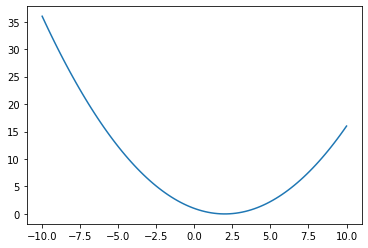

In [41]:
plt.plot(beta,loss)

`-` 정지조건?

알고리즘이 멈추는 지점은 $\beta=2$이다. 왜냐하면 이경우 왼쪽으로 가도, 오른쪽으로 가도 현재 손실함수값보다 크기 때문

`-` [-10,10] 이외에 해가 존재? 

이 알고리즘은 $loss=(x \beta-y)^2$의 꼴에서 $[-10,10]$ 이외의 지점에 해가 존재하여도 적절하게 해를 찾을 것.

`-` $\beta=2$를 찾았다면? 

또한 비효율적으로 $\beta=2$ 이후에도 탐색을 반복하지 않는다

`-` 알고리즘해석 
- (2)의 과정: 미분을 하라는 뜩
- (3)의 과정: update

> Note: 이처럼 손실함수의 기울기(=경사)를 계산하여 점차적으로 가중치를 업데이트 하는 방식을 경사하강법이라고 부른다. 

#### 왼쪽/오른쪽중에 어디로 갈지 어떻게 판단하는 과정을 수식화?

`-` 아래와 같이 해석 가능
- 오른쪽으로 0.01 간다 = $\beta_{old}$에 0.01을 더함. (if, 미분계수가 음수)
- 왼쪽으로 0.01 간다 = $\beta_{old}$에 0.01을 뺌. (if, 미분계수가 양수)

`-` 수식화

$\beta_{new} = \begin{cases} \beta_{old} + 0.01, & loss'(\beta_{old}) <0 \\ \beta_{old} - 0.01,& loss'(\beta_{old})>0 \end{cases}$

#### 혹시, 알고리즘을 좀 개선할수 있을까?

`-` 왜 0.01씩? 항상 동일하게 0.01 씩 움직여야 할까?

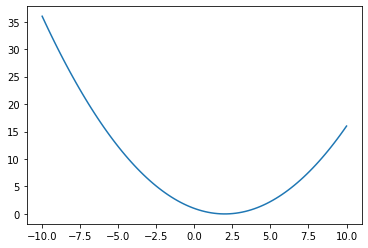

In [42]:
plt.plot(beta,loss)

`-` 아이디어

보폭을 조정해보자, 최적값에 가까우면 보폭을 작게

`-` $\beta=-10$ 일 경우의 접선의 기울기? $\beta=-4$ 일때 접선의 기울기?

- $\beta = 10$ $\rightarrow$ 기울기는 -6

In [257]:
(-10/2-1)

-6.0

- $\beta = 4$ $\rightarrow$ 기울기는 -3

In [258]:
(-4/2-1)

-3.0

$\therefore loss=(0.5 \beta−1)^2 \rightarrow loss ′ =0.5\beta−1$

- $β=−10$에서 $0.01$만큼 이동했다면 $\beta=−4$에서 $0.005$만큼 이동해야함

`-` 실제로 6,3씩 이동할 수는 없으니 적당한 $\alpha$를 잡아서 곱한만큼 이동하자

`-` 수식화 

결국은 위 식과 같음, 단, 알파가 양수여야 함

- $\beta_{new} = \beta_{old} - \alpha loss' (\beta_{old})$
- $\beta_{new} = \beta_{old} - \alpha \big[ \frac{\partial}{\partial \alpha}loss(\beta) \big]_{\beta = \beta_{old}}$

위의 식에서 아래는 벡터버전 식임

`-` 식의 의미

- 아까 수식이랑 좀 다르다?  달라보이지만 $\beta_{old}$를 이동시켜 $\beta_{next}$를 만든다는 개념은 같음
- $\alpha$가 크면 큰 보폭으로 움직이고 작으면 작은 보폭으로 움직인다.
- $\alpha>0$ 이어야 한다. 
    - 음수면 loss를 최대화하는 식이 되어버림..log likelihood 에서 사용 가능하겠지..
- $\alpha$의 의미: 한번 업데이트할때 움직이는 보폭
- $\beta=-10$ 에서 $0.01$만큼 움직이기 위한 $\alpha$의 설정;
    - $\alpha = \frac{0.01}{6}$

#### 구현코드 

`-` **iter 1:** 

$\beta = -10$ 이라고 히자

In [269]:
beta = tf.Variable(-10.0)

In [270]:
with tf.GradientTape(persistent=True) as tape:
    loss = (beta/2-1)**2

In [271]:
tape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-6.0>

직접 풀었던 위의 값이랑 같네!

$\beta = -10$ 에서 0.01 만큼 움직이고 싶다.

In [272]:
alpha = 0.01/6

In [273]:
alpha * tape.gradient(loss,beta)

<tf.Tensor: shape=(), dtype=float32, numpy=-0.01>

In [274]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-10.0>

왜 tf.Variable의 메소드에 assign_add, assign_sub 정도만 있는지?
- assign 은 초기화하고 싶을떄, add와 sub만 핗요해서 두 개 밖에..

In [275]:
beta.assign_sub(alpha * tape.gradient(loss,beta))

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.99>

In [276]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.99>

`-` **iter 2:** 

In [277]:
with tf.GradientTape(persistent=True) as tape: # -9,99인 상태로 미분 다시하려고
    loss = (beta/2-1)**2

In [278]:
beta.assign_sub(tape.gradient(loss,beta) * alpha) # 더 나은 베터가 나왔다.

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.980008>

persistenct도 왜 디폴트가 False인지?
- Vriable 기본?(관찰함)
- constant 관찰 안 함

`-` for 문을 이용하자

(강의용)

In [279]:
beta = tf.Variable(-10.0)

In [280]:
for k in range(10000):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss,beta) * alpha)

In [281]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=1.997125>

(시도1)

In [282]:
beta = tf.Variable(-10.0)

In [283]:
for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss,beta) * alpha)

In [284]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-9.040152>

(시도2)

In [285]:
beta = tf.Variable(-10.0)

In [286]:
for k in range(1000):
    with tf.GradientTape(persistent=True) as tape:
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss,beta) * alpha)

In [287]:
beta

<tf.Variable 'Variable:0' shape=() dtype=float32, numpy=-3.2133687>

`-` 너무 느린 것 같다? $\to$ $\alpha$ 를 키워보자

---

학습률

`-` $\alpha$에 따라서 수련과정이 어떻게 달라지는지 시각화 해보자

#### [시각화 코드 예비학습]

모든 것을 객체화하는 것이 가능할까..

- 도화지와 네모틀 생성

In [307]:
fig = plt.figure()  # 도화지가 만들어지고 fig라는 이름을 붙인다.

<Figure size 432x288 with 0 Axes>

In [308]:
fig

<Figure size 432x288 with 0 Axes>

In [309]:
ax = fig.add_subplot() # fig는 ax라는 네모틀(물체)를 만든다.

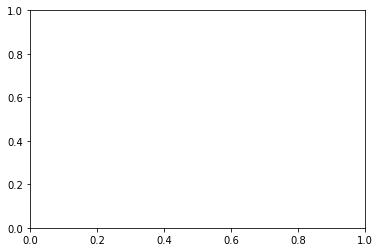

In [310]:
fig

In [311]:
type(fig.axes)

list

- 도화지와 네모틀는 포함관계에 있음.

In [312]:
id(fig.axes[0]) # 여기 저장되어 있군..

140654615787984

In [313]:
id(ax) # 똑같네..

140654615787984

```python
pnts = ax.plot([1,2,3],[4,5,6],'or')
pnts # 리스트
```

- 네모틀(ax)의 특수기능(=메소드)중에는 plot이 있음. 이것은 또 어떤 오브젝트를 생성함

In [314]:
pnts, = ax.plot([1,2,3],[4,5,6],'or')
pnts

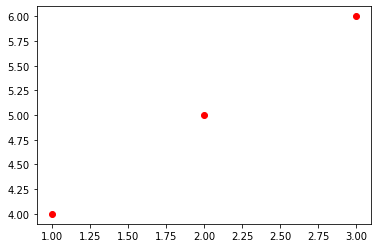

In [315]:
fig

---

In [316]:
a =1,
a+a

(1, 1)

In [317]:
a,=[1]

In [318]:
a

1

---

- pnts 오브젝트: x,y data를 변경해보자.

In [319]:
pnts.get_xdata()

array([1, 2, 3])

In [320]:
pnts.get_ydata()

array([4, 5, 6])

In [321]:
pnts.set_ydata([5,5,5])

In [322]:
pnts.get_ydata()

[5, 5, 5]

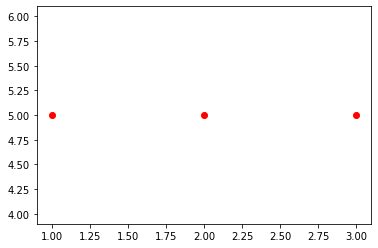

In [323]:
fig

`-` 응용; 에니매이션

- 환경설정

In [324]:
plt.rcParams["animation.html"] = "jshtml"
from matplotlib import animation

In [325]:
def animate(i):
    if i%2 == 0:
        pnts.set_ydata([4,5,6])
    else:
        pnts.set_ydata([5,5,5])

In [326]:
ani = animation.FuncAnimation(fig,animate, frames=30) # 도화지 전달, 어떻게 전달할지 룰 전달

In [327]:
ani

예비학습 끝

---

다시 학습과정 시각화 문제로 돌아오자.

`-` beta_lst = [-10,-9,-8] 로 이동한다고 하자

In [328]:
beta_lst = [-10.0,-9.0,-8.0]

In [329]:
loss_lst = [(-10.0/2-1)**2, (-9.0/2-1)**2, (-8.0/2-1)**2]

In [330]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [331]:
_beta = np.linspace(-15,19,100)

In [332]:
ax = fig.add_subplot()

In [333]:
ax.plot(_beta,(_beta/2-1)**2)

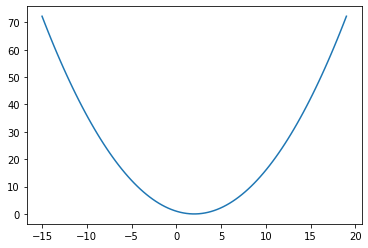

In [334]:
fig

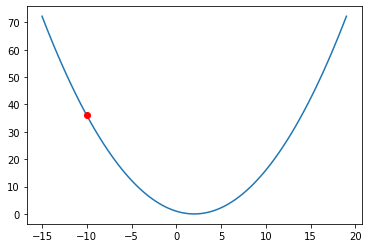

In [335]:
pnts, = ax.plot(beta_lst[0],loss_lst[0],'ro')
fig

In [336]:
def animate(i):
    pnts.set_xdata(beta_lst[:(i+1)])
    pnts.set_ydata(loss_lst[:(i+1)])

In [337]:
ani = animation.FuncAnimation(fig, animate, frames = 3)
ani

`-` 최종아웃풋

In [338]:
beta = tf.Variable(-10.0)
alpha = 0.01/6

In [339]:
beta.numpy() # 넘파이 화, 이전 시간 배운 거

-10.0

In [340]:
beta_lst = []
loss_lst = []

---

In [341]:
beta.numpy()

-10.0

---

In [342]:
beta_lst.append(beta.numpy())
loss_lst.append(((beta.numpy()/2-1)**2))

In [343]:
with tf.GradientTape(persistent=True) as tape:
    tape.watch(beta) # variable로 잡아서 안 해도 되긴 하지만..
    loss = (beta/2-1)**2

In [344]:
beta.assign_sub(tape.gradient(loss,beta) * alpha)

<tf.Variable 'UnreadVariable' shape=() dtype=float32, numpy=-9.99>

In [345]:
beta_lst.append(beta.numpy())
loss_lst.append((beta.numpy()/2-1)**2)

In [346]:
beta_lst, loss_lst

([-10.0, -9.99], [36.0, 35.94002362785341])

`-` for

In [347]:
beta = tf.Variable(-10.0)
alpha = 0.01/6
beta_lst = []
loss_lst = []
beta_lst.append(beta.numpy())
loss_lst.append(((beta.numpy()/2-1)**2))
for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(beta) 
        loss = (beta/2-1)**2
    beta.assign_sub(tape.gradient(loss,beta) * alpha)
    beta_lst.append(beta.numpy())
    loss_lst.append((beta.numpy()/2-1)**2)

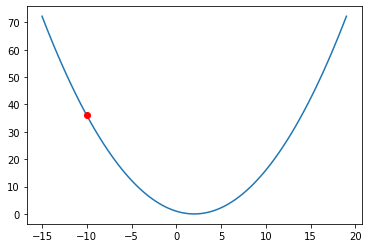

In [348]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(_beta,(_beta/2-1)**2)
pnts, = ax.plot(beta_lst[0], loss_lst[0],'or')

In [ ]:
ani = animation.FuncAnimation(fig,animate,frames=100)
ani

다음시간 알파바꿔 시도해보는 시간

`-` 과제

$y = (x-1)^2$ 를 최소화 하는 $x$를 경사하강법을 이용하여 찾아라. 수렴과정을 animation으로 시각화하라.

- $x$의 초기값은 -3으로 설정한다.
- 적당한 $\alpha$를 골라서 100번의 반복안에 수렴하도록 하라.

In [210]:
fig = plt.figure()

<Figure size 432x288 with 0 Axes>

In [211]:
_x = np.linspace(-8,10,100)

In [212]:
ax = fig.add_subplot()

In [213]:
ax.plot(_x,(_x-1)**2)

$\frac{d}{dx}y = 2(x-1)$

In [214]:
x = tf.Variable(-3.0)
alpha=0.1/(7)
x_lst=[]
y_lst=[]
x_lst.append(x.numpy())
y_lst.append((x.numpy()-1)**2)
for k in range(100):
    with tf.GradientTape(persistent=True) as tape:
        tape.watch(x)
        y = (x-1)**2
    x.assign_sub(tape.gradient(y,x) * alpha)
    x_lst.append(x.numpy())
    y_lst.append((x.numpy()-1)**2)

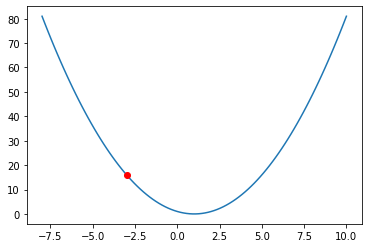

In [215]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(_x,(_x-1)**2)
pnts, = ax.plot(x_lst[0], y_lst[0],'or')

In [216]:
def animate(i):
    pnts.set_xdata(x_lst[:(i+1)])
    pnts.set_ydata(y_lst[:(i+1)])

In [217]:
ani =animation.FuncAnimation(fig,animate,frames=100)
ani